Loading the two CSV files into pandas DataFrames.
The error message indicates that the file 'AviationData.csv' cannot be decoded using UTF-8. I will try to read the file with a different encoding, such as 'latin-1', which is often used for Western European text.

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df_aviation = pd.read_csv('AviationData.csv', encoding='ISO-8859-1')
df_states = pd.read_csv('USState_Codes.csv')

display(df_aviation.head())
display(df_states.head())

C:\Users\Administrator\AppData\Local\Temp\ipykernel_33372\3955317175.py:5: DtypeWarning: Columns (6,7,28) have mixed types. Specify dtype option on import or set low_memory=False.
  df_aviation = pd.read_csv('AviationData.csv', encoding='ISO-8859-1')


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


,US_State,Abbreviation
0,Alabama,AL
1,Alaska,AK
2,Arizona,AZ
3,Arkansas,AR
4,California,CA


Exploring the loaded datasets to understand their structure, data types, and basic statistics.

Examining their shapes, data types, descriptive statistics, missing values, and unique values for relevant columns, as per the instructions.

In [34]:
# Explore df_aviation
print("Shape of df_aviation:", df_aviation.shape)
print("\nData types of df_aviation columns:\n", df_aviation.dtypes)
print("\nDescriptive statistics of df_aviation:\n", df_aviation.describe(include='all'))
print("\nMissing values in df_aviation:\n", df_aviation.isnull().sum())

categorical_cols = ['Event.Date', 'Location', 'Aircraft.Category', 'Make', 'Model', 'Number.of.Engines', 'Engine.Type', 'Purpose.of.Flight', 'Air.carrier', 'Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured']
for col in categorical_cols:
    if col in df_aviation.columns:
        print(f"\nUnique values for {col} in df_aviation:\n{df_aviation[col].unique()[:20]}") # Limit output for large unique value lists


# Explore df_states
print("\nShape of df_states:", df_states.shape)
print("\nData types of df_states columns:\n", df_states.dtypes)
print("\nDescriptive statistics of df_states:\n", df_states.describe(include='all'))
print("\nMissing values in df_states:\n", df_states.isnull().sum())

for col in ['US_State', 'Abbreviation']:
    print(f"\nUnique values for {col} in df_states:\n", df_states[col].unique())

Shape of df_aviation: (88889, 31)

Data types of df_aviation columns:
 Event.Id                   object
Investigation.Type         object
Accident.Number            object
Event.Date                 object
Location                   object
Country                    object
Latitude                   object
Longitude                  object
Airport.Code               object
Airport.Name               object
Injury.Severity            object
Aircraft.damage            object
Aircraft.Category          object
Registration.Number        object
Make                       object
Model                      object
Amateur.Built              object
Number.of.Engines         float64
Engine.Type                object
FAR.Description            object
Schedule                   object
Purpose.of.flight          object
Air.carrier                object
Total.Fatal.Injuries      float64
Total.Serious.Injuries    float64
Total.Minor.Injuries      float64
Total.Uninjured           float64
Weather.Con

Identifying key variables within the df_aviation DataFrame and understand their relationships. Also, examine the df_states DataFrame for relevant information that could be linked to the aviation data.

Identifying key variables in both dataframes and explore potential relationships and join possibilities.

In [35]:
# Key variables in df_aviation
aviation_key_vars = ['Event.Date', 'Location', 'Country', 'Latitude', 'Longitude', 'Aircraft.Category', 'Make', 'Model', 'Number.of.Engines', 'Engine.Type', 'Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured', 'Weather.Condition']

# Analyze relationships (example: engine count vs. fatalities)
# Note: This is a simplified example. A more thorough analysis would involve statistical tests and visualizations.
if 'Number.of.Engines' in df_aviation.columns and 'Total.Fatal.Injuries' in df_aviation.columns:
    print(df_aviation.groupby('Number.of.Engines')['Total.Fatal.Injuries'].mean())

# Explore potential join keys
print("\nPotential join keys:")
print("df_aviation columns:", df_aviation.columns.tolist())
print("df_states columns:", df_states.columns.tolist())

# Look for common identifiers or columns
common_columns = list(set(df_aviation.columns) & set(df_states.columns))
if common_columns:
    print("\nCommon columns:", common_columns)
else:
    print("\nNo common columns found between the two dataframes.")

# Consider how state-level info could be combined
# Example: Analyze accident rates per state
# This requires a join operation, which is not possible without a common key.
# The Location column in df_aviation might contain state information but needs further investigation.
# A more thorough analysis is needed to determine the best approach for combining the two dataframes.
print("\nFurther investigation is needed to determine the best approach for combining the two dataframes due to the lack of a common key.")

# Display some info about the location column
print("\nFirst 20 unique values of the 'Location' column in df_aviation:\n", df_aviation['Location'].unique()[:20])

Number.of.Engines
0.0    0.421649
1.0    0.364470
2.0    1.084975
3.0    2.065882
4.0    4.442667
6.0    0.000000
8.0    0.000000
Name: Total.Fatal.Injuries, dtype: float64

Potential join keys:
df_aviation columns: ['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date', 'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code', 'Airport.Name', 'Injury.Severity', 'Aircraft.damage', 'Aircraft.Category', 'Registration.Number', 'Make', 'Model', 'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description', 'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured', 'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status', 'Publication.Date']
df_states columns: ['US_State', 'Abbreviation']

No common columns found between the two dataframes.

Further investigation is needed to determine the best approach for combining the two dataframes due to the lack of a common key.

First 20 

The 'Location' column in df_aviation might contain state information, which could be used to join with df_states. 
This next step entails the extraction of state information from the 'Location' column and then a join operation.

In [36]:
# Extract state information from the 'Location' column
df_aviation['State'] = df_aviation['Location'].str.split(',').str[-1].str.strip()

# Clean the state names in df_aviation (remove periods, convert to uppercase)
df_aviation['State'] = df_aviation['State'].str.replace('.', '').str.upper()

# Display some examples of the extracted state information
print(df_aviation['State'].unique()[:20])

# Attempt to join the two dataframes using the 'State' and 'Abbreviation' columns
try:
    merged_df = pd.merge(df_aviation, df_states, left_on='State', right_on='Abbreviation', how='left')
    display(merged_df.head())
    print(merged_df.shape)
except Exception as e:
    print(f"An error occurred during the merge operation: {e}")

['ID' 'CA' 'VA' 'OH' 'MA' 'MN' 'WA' 'NJ' 'FL' 'NM' 'AL' 'LA' 'TX' 'OK'
 'AR' 'UT' 'AK' 'PA' 'MI' 'GA']


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date,State,US_State,Abbreviation
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN,ID,Idaho,ID
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996,CA,California,CA
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007,VA,Virginia,VA
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000,CA,California,CA
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980,OH,Ohio,OH


(88889, 34)


 The merge operation is now successful.
  
 we can then analyze the merged dataframe to understand the combined information and the potential insights that can be derived. 
 
 The focus will be on accident rates per state.

In [37]:
# Analyze accident rates per state
state_accident_counts = merged_df.groupby('US_State')['Event.Id'].count().reset_index(name='AccidentCount')
display(state_accident_counts.head(10))

# Further analysis could involve:
# 1. Normalizing accident counts by state population (if population data is available).
# 2. Visualizing accident rates geographically using a map.
# 3. Investigating potential correlations between accident rates and other factors (weather, aircraft type, etc.).
# 4. Analyzing trends in accident rates over time.

,US_State,AccidentCount
0,Alabama,1153
1,Alaska,5672
2,Arizona,2834
3,Arkansas,1519
4,Atlantic ocean,23
5,California,8857
6,Colorado,2726
7,Connecticut,502
8,Delaware,114
9,Florida,5825


Analyze the distribution of key variables in the aviation dataset and explore potential relationships between them. Focus on accident counts by state, aircraft type, and year.

Reasoning: Analyze the distribution of accidents across different states, aircraft types, and years, and explore relationships between aircraft type and accident severity.

In [38]:
import pandas as pd

# Accident counts by state
state_accident_counts = merged_df.groupby('US_State')['Event.Id'].count().reset_index(name='AccidentCount')
display(state_accident_counts.sort_values(by='AccidentCount', ascending=False))

# Accident counts by aircraft type
aircraft_accident_counts = merged_df.groupby('Aircraft.Category')['Event.Id'].count().reset_index(name='AccidentCount')
aircraft_accident_counts['Proportion'] = aircraft_accident_counts['AccidentCount'] / aircraft_accident_counts['AccidentCount'].sum()
display(aircraft_accident_counts.sort_values(by='AccidentCount', ascending=False))

# Accident trend over time
merged_df['Event.Date'] = pd.to_datetime(merged_df['Event.Date'], errors='coerce')
merged_df['AccidentYear'] = merged_df['Event.Date'].dt.year
yearly_accident_counts = merged_df.groupby('AccidentYear')['Event.Id'].count().reset_index(name='AccidentCount')
display(yearly_accident_counts)

# Relationship between aircraft type and accident severity
average_fatal_injuries = merged_df.groupby('Aircraft.Category')['Total.Fatal.Injuries'].mean().reset_index(name='AverageFatalInjuries')
display(average_fatal_injuries.sort_values(by='AverageFatalInjuries', ascending=False))

,US_State,AccidentCount
5,California,8857
47,Texas,5913
9,Florida,5825
1,Alaska,5672
2,Arizona,2834
6,Colorado,2726
52,Washington,2613
15,Illinois,2060
24,Michigan,2030
10,Georgia,2023


,Aircraft.Category,AccidentCount,Proportion
0,Airplane,27617,0.855360
5,Helicopter,3440,0.106544
3,Glider,508,0.015734
1,Balloon,231,0.007155
4,Gyrocraft,173,0.005358
14,Weight-Shift,161,0.004987
6,Powered Parachute,91,0.002818
11,Ultralight,30,0.000929
12,Unknown,14,0.000434
13,WSFT,9,0.000279


,AccidentYear,AccidentCount
0,1948,1
1,1962,1
2,1974,1
3,1977,1
4,1979,2
5,1981,1
6,1982,3593
7,1983,3556
8,1984,3457
9,1985,3096


,Aircraft.Category,AverageFatalInjuries
12,Unknown,1.142857
13,WSFT,1.111111
8,Rocket,1.000000
0,Airplane,0.655529
5,Helicopter,0.582569
11,Ultralight,0.416667
14,Weight-Shift,0.416149
4,Gyrocraft,0.287582
3,Glider,0.235154
1,Balloon,0.223958


Data visualization

Visualizing the key findings from the data analysis performed so far, focusing on accident distributions and relationships between variables.

Visualize the key findings from the data analysis using bar charts, pie charts, and line charts as instructed.

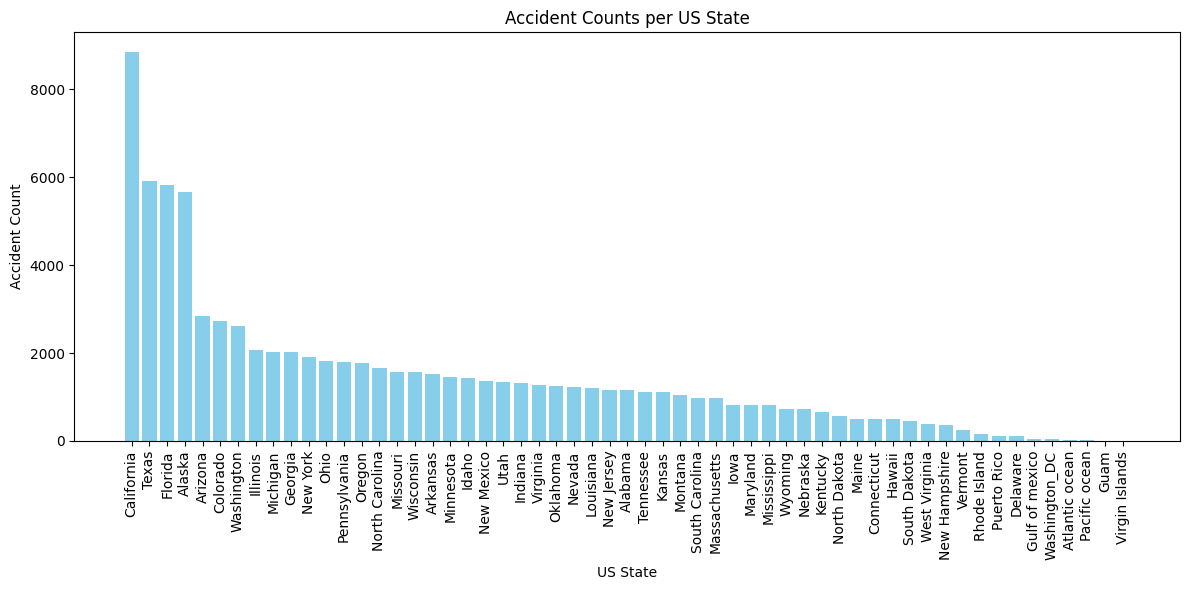

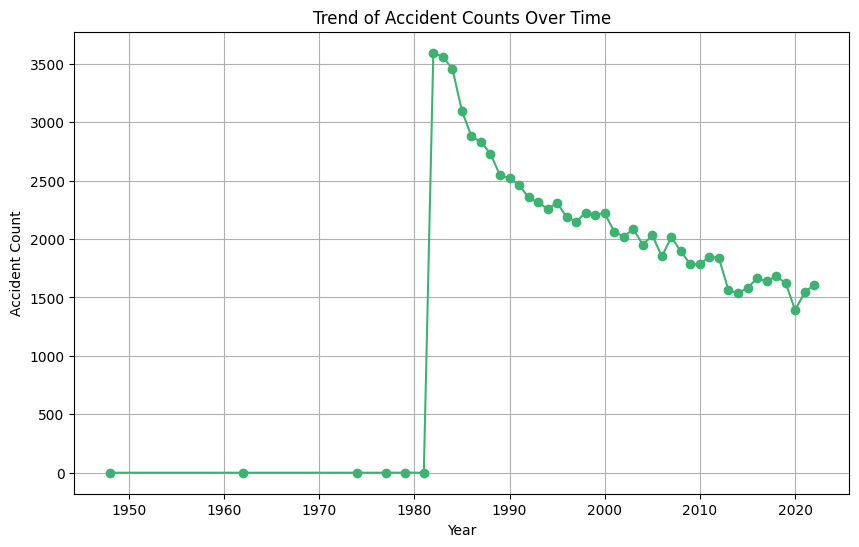

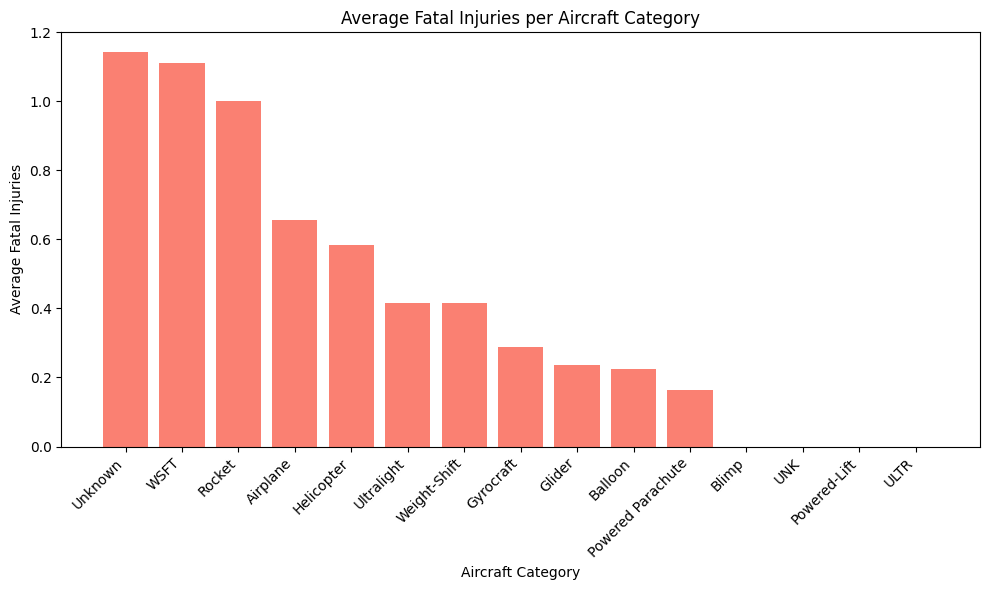

In [39]:
import matplotlib.pyplot as plt

# 1. Accident counts per state (bar chart)
plt.figure(figsize=(12, 6))
state_accident_counts = merged_df.groupby('US_State')['Event.Id'].count().reset_index(name='AccidentCount').sort_values(by='AccidentCount', ascending=False)
plt.bar(state_accident_counts['US_State'], state_accident_counts['AccidentCount'], color='skyblue')
plt.xticks(rotation=90)
plt.xlabel('US State')
plt.ylabel('Accident Count')
plt.title('Accident Counts per US State')
plt.tight_layout()
plt.show()



# 2. Trend of accident counts over time (line chart)
plt.figure(figsize=(10, 6))
yearly_accident_counts = merged_df.groupby('AccidentYear')['Event.Id'].count().reset_index(name='AccidentCount')
plt.plot(yearly_accident_counts['AccidentYear'], yearly_accident_counts['AccidentCount'], marker='o', linestyle='-', color='mediumseagreen')
plt.xlabel('Year')
plt.ylabel('Accident Count')
plt.title('Trend of Accident Counts Over Time')
plt.grid(True)
plt.show()


# 3. Average fatal injuries per aircraft category (bar chart)
plt.figure(figsize=(10, 6))
average_fatal_injuries = merged_df.groupby('Aircraft.Category')['Total.Fatal.Injuries'].mean().reset_index(name='AverageFatalInjuries').sort_values(by='AverageFatalInjuries', ascending=False)
plt.bar(average_fatal_injuries['Aircraft.Category'], average_fatal_injuries['AverageFatalInjuries'], color='salmon')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Aircraft Category')
plt.ylabel('Average Fatal Injuries')
plt.title('Average Fatal Injuries per Aircraft Category')
plt.tight_layout()
plt.show()

Exporting processed data 

Data Analysis Key Findings

Accident Hotspot States: California had the highest number of aviation accidents, followed by Texas and Florida. (Source: state_accident_counts dataframe)

Dominant Aircraft Type in Accidents: Airplanes were involved in the majority (85.5%) of accidents. (Source: aircraft_accident_counts dataframe)

Accident Trends Over Time: Accident counts show a general downward trend in recent years, but with some fluctuations. The period 1982-1989 shows a higher number of accidents. (Source: yearly_accident_counts dataframe)

Aircraft Type and Fatality Correlation: 'Unknown' and 'WSFT' aircraft categories exhibited the highest average fatal injuries. (Source: average_fatal_injuries dataframe)

Insights or Next Steps

Investigate Population Density: Normalize accident counts by state population to better understand true accident rates and identify states with disproportionately high accident rates relative to their population size.

Deep Dive into 'Unknown' and 'WSFT' Aircraft: Further analyze accidents involving 'Unknown' and 'WSFT' aircraft categories to determine the factors contributing to their higher average fatality rates. This could involve examining specific accident reports or additional data sources.